<a href="https://colab.research.google.com/github/brucebra000/DS-Unit-2-Applied-Modeling/blob/master/U2S3A2_Permutation_and_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 2*

---


# Permutation & Boosting

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] If you haven't completed assignment #1, please do so first.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline? 
- [ ] Try xgboost.
- [ ] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.

But, if you aren't ready to try xgboost and permutation importances with your dataset today, that's okay. You can practice with another dataset instead. You may choose any dataset you've worked with previously.

The data subdirectory includes the Titanic dataset for classification and the NYC apartments dataset for regression. You may want to choose one of these datasets, because example solutions will be available for each.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - _**[A Kaggle Master Explains Gradient Boosting](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)**_
  - [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf) Chapter 8
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html)
  - _**[Boosting](https://www.youtube.com/watch?v=GM3CDQfQ4sw) (2.5 minute video)**_

In [0]:
import numpy as np
import pandas as pd
import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from google.colab import files
from xgboost import XGBClassifier

In [8]:
upload = files.upload()

Saving rotten_tomatoes_movies.csv to rotten_tomatoes_movies.csv


In [9]:
df = pd.read_csv('rotten_tomatoes_movies.csv')
print(df.shape)
df.head()

(16638, 23)


,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,poster_image_url,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,audience_top_critics_count,audience_fresh_critics_count,audience_rotten_critics_count
0,/m/0814255,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,https://resizing.flixster.com/p1veUpQ4ktsSHtRu...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,Spilled,53.0,254287.0,38,71,73
1,/m/0878835,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,https://resizing.flixster.com/0AbudQ4KsB4BeXSB...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,Upright,64.0,11567.0,43,121,19
2,/m/10,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,https://resizing.flixster.com/mF0dxH6UTa0FdkMs...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,Spilled,53.0,14670.0,2,15,7
3,/m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,https://resizing.flixster.com/u-8xAyGaDVvROLiR...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,Upright,97.0,105000.0,6,51,0
4,/m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",https://resizing.flixster.com/FKExgYBHu07XLoil...,G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,Upright,74.0,68860.0,5,24,3


In [11]:
#Cleaning the dataset
clean_df = df
dropped_features = ['rotten_tomatoes_link', 'movie_title', 'movie_info', 'poster_image_url', 'tomatometer_rating', 'critics_consensus', 'genre', 'cast']
clean_df = clean_df.drop(columns = dropped_features)

print(clean_df.shape)
clean_df.head()

(16638, 15)


,rating,directors,writers,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_count,audience_status,audience_rating,audience_count,audience_top_critics_count,audience_fresh_critics_count,audience_rotten_critics_count
0,PG,Chris Columbus,Craig Titley,2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,144,Spilled,53.0,254287.0,38,71,73
1,R,Nicole Holofcener,Nicole Holofcener,2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,140,Upright,64.0,11567.0,43,121,19
2,R,Blake Edwards,Blake Edwards,1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,22,Spilled,53.0,14670.0,2,15,7
3,NR,Sidney Lumet,Reginald Rose,1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,51,Upright,97.0,105000.0,6,51,0
4,G,Richard Fleischer,Earl Felton,1954-01-01,2003-05-20,127.0,Disney,Fresh,27,Upright,74.0,68860.0,5,24,3


In [12]:
clean_df.isnull().sum()

rating                              0
directors                         114
writers                          1349
in_theaters_date                  815
on_streaming_date                   2
runtime_in_minutes                155
studio_name                       416
tomatometer_status                  0
tomatometer_count                   0
audience_status                   252
audience_rating                   252
audience_count                    252
audience_top_critics_count          0
audience_fresh_critics_count        0
audience_rotten_critics_count       0
dtype: int64

In [14]:
clean_df = clean_df.dropna(axis = 0)
clean_df.shape

(14181, 15)

In [19]:
#Train, Val, and Test sets
train, test = train_test_split(clean_df, stratify = clean_df['tomatometer_status'], random_state = 1)
train, val = train_test_split(train, stratify = train['tomatometer_status'], random_state = 1)
train.shape, val.shape, test.shape

((7976, 15), (2659, 15), (3546, 15))

In [20]:
#X features matrix and Y target vector
clean_df.select_dtypes(include = 'number').nunique()

runtime_in_minutes                 191
tomatometer_count                  390
audience_rating                     98
audience_count                   10335
audience_top_critics_count          65
audience_fresh_critics_count       344
audience_rotten_critics_count      199
dtype: int64

In [21]:
clean_df.select_dtypes(exclude = 'number').nunique()

rating                    8
directors              6949
writers               11237
in_theaters_date       5216
on_streaming_date      2098
studio_name            2411
tomatometer_status        3
audience_status           2
dtype: int64

In [0]:
target = 'tomatometer_status'
x_train = train.drop(columns = target)
y_train = train[target]
x_val = val.drop(columns = target)
y_val = val[target]
x_test = test.drop(columns = target)
y_test = test[target]

In [29]:
#Fitting a model
pipeline1 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy = 'mean'),
    RandomForestClassifier(n_estimators = 100, random_state = 1, n_jobs = -1)
)

pipeline1.fit(x_train, y_train)
print('Validation Accuracy Score:', pipeline1.score(x_val, y_val))

Validation Accuracy Score: 0.9661526889808199


In [26]:
y_pred = pipeline.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9672870840383531


In [30]:
#xgboost
pipeline2 = make_pipeline(
    ce.OrdinalEncoder(),
    XGBClassifier(n_estimators = 100, random_state = 1, n_jobs = -1)
)

pipeline2.fit(x_train, y_train)
print('Validation Accuracy Score:', pipeline2.score(x_val, y_val))

Validation Accuracy Score: 0.9740503948852952


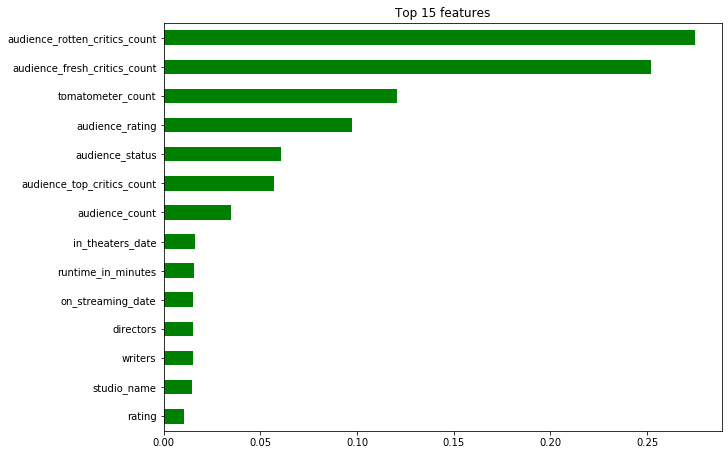

In [32]:
#permutation importances
rf = pipeline1.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, x_train.columns)

%matplotlib inline

n = 15
plt.figure(figsize = (10, n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color = 'green');